In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
download_speed_dir = "./download_speed/"
fairness_dir = "./fairness/"
figures_dir = "./figures/"
bandwidth_sizes = ["1mbps", "10mbps", "100mbps", "1000mbps"]
file_sizes = ["5KB.txt", "10KB.txt", "100KB.txt", "200KB.txt", "500KB.txt", "1MB.txt", "10MB.txt"]
clients = ["HTTP", "QUICHE"]

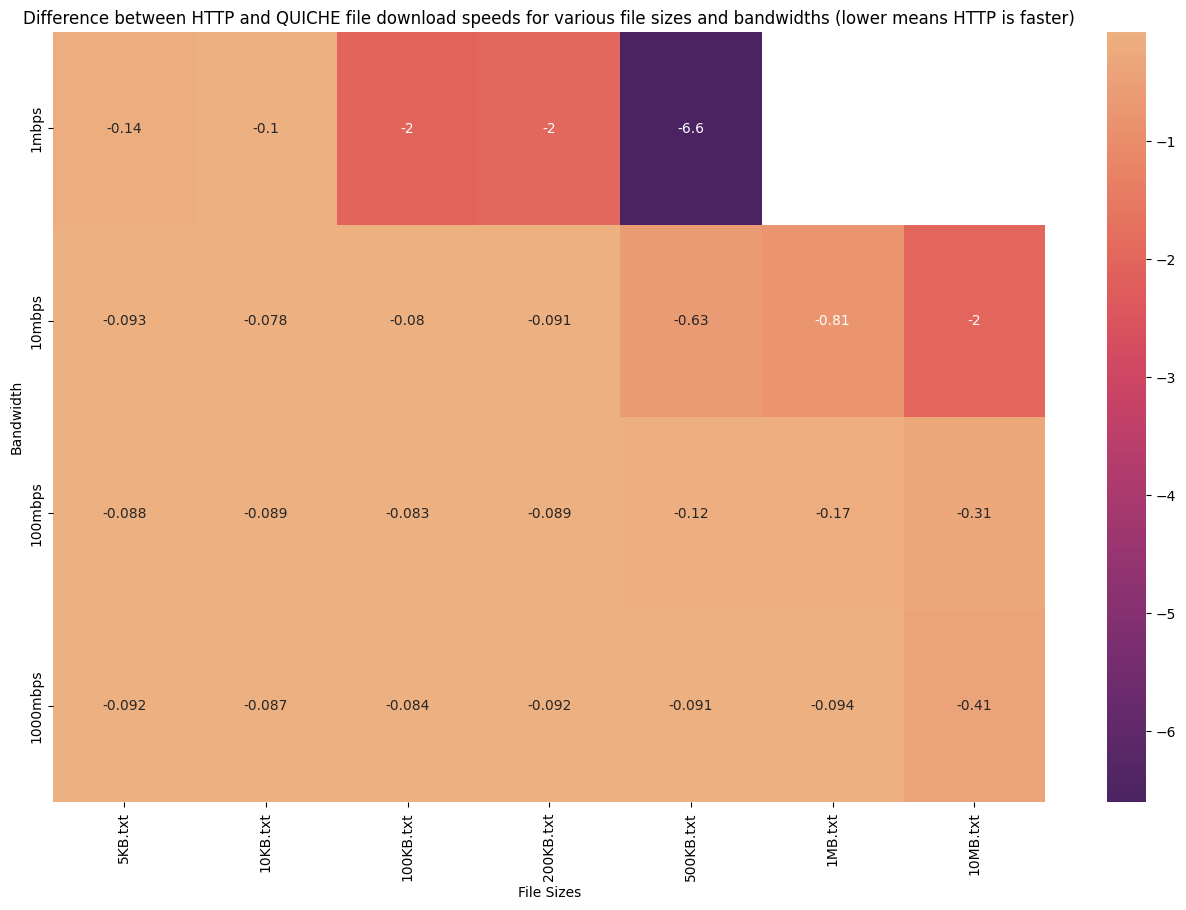

In [ ]:
def generate_download_speed_heatmap():
    combined_df = pd.DataFrame(columns=file_sizes)
    for bandwidth_size in bandwidth_sizes:
        http_df = pd.read_csv(download_speed_dir + bandwidth_size + "_HTTP.csv")
        quiche_df = pd.read_csv(download_speed_dir + bandwidth_size + "_QUICHE.csv")
        combined_df.loc[bandwidth_size] = (
            http_df.mean(axis=0).subtract(quiche_df.mean(axis=0)).rename(bandwidth_size)
        )

    p = sns.heatmap(combined_df, annot=True, cmap="flare_r")
    p.set_title("Difference between HTTP and QUICHE file download speeds for various file sizes and bandwidths (lower means HTTP is faster)")
    p.set_xlabel("File Sizes")
    p.set_ylabel("Bandwidth")

generate_download_speed_heatmap()